In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
#import the csv file
data = pd.read_csv("ScoresPrediction.csv")

#print the frist five row of the dataset or dataframe
data.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
0,5,6,2,0,6,6
1,5,5,2,0,4,6
2,7,8,2,3,10,10
3,15,14,3,0,2,15
4,6,10,2,0,4,10


In [3]:
# print the shape of the data
data.shape

(395, 6)

In [4]:
#print the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   FirstYrScore   395 non-null    int64
 1   SecondYrScore  395 non-null    int64
 2   StudyTime      395 non-null    int64
 3   Failures       395 non-null    int64
 4   Absences       395 non-null    int64
 5   FinalYrScore   395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


In [5]:
# checking the is there any null value of not

data.isnull().any()

FirstYrScore     False
SecondYrScore    False
StudyTime        False
Failures         False
Absences         False
FinalYrScore     False
dtype: bool

In [6]:
# check the null value or not 
data.isnull().sum()

FirstYrScore     0
SecondYrScore    0
StudyTime        0
Failures         0
Absences         0
FinalYrScore     0
dtype: int64

In [7]:
features = data.iloc[:,:-1]
prediction = data.iloc[:,-1]

In [8]:
features.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences
0,5,6,2,0,6
1,5,5,2,0,4
2,7,8,2,3,10
3,15,14,3,0,2
4,6,10,2,0,4


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,prediction,test_size=0.2,random_state=42,shuffle=True)

In [10]:
Train_data = pd.concat([x_train,y_train],axis='columns',names=['FirstYrScore','SecondYrScore','StudyTime','Failures','Absences','FinalYrScore'])

In [11]:
Train_data.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
181,12,13,2,0,2,12
194,13,14,1,0,0,14
173,8,7,2,3,0,0
63,10,9,3,0,2,9
253,8,9,1,0,0,8


In [12]:
Train_data.describe()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,10.933544,10.651899,2.047468,0.335443,5.905063,10.325949
std,3.216823,3.755930,0.836258,0.735588,8.422033,4.590337
min,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.000000,9.000000,1.000000,0.000000,0.000000,8.000000
50%,11.000000,11.000000,2.000000,0.000000,4.000000,11.000000
75%,13.000000,13.000000,2.000000,0.000000,8.000000,13.000000
max,19.000000,19.000000,4.000000,3.000000,75.000000,20.000000


In [13]:
#correlation 
corr_mat = Train_data.corr(method='pearson')
corr_mat

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
FirstYrScore,1.000000,0.833365,0.202975,-0.346077,-0.004218,0.791559
SecondYrScore,0.833365,1.000000,0.153854,-0.335638,-0.007070,0.907924
StudyTime,0.202975,0.153854,1.000000,-0.129183,-0.029558,0.138200
Failures,-0.346077,-0.335638,-0.129183,1.000000,0.023092,-0.373769
Absences,-0.004218,-0.007070,-0.029558,0.023092,1.000000,0.064607
FinalYrScore,0.791559,0.907924,0.138200,-0.373769,0.064607,1.000000


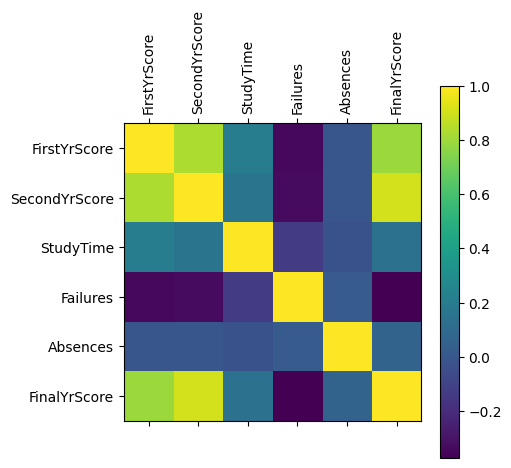

In [14]:
# Visualize the correlation matrix

plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
plt.colorbar()
plt.show()


The feature SecondYrScore is the most correlated witht the target variable with a correlation coefficient of ~0.91. This is follwed by the FirstYrScore with a score of ~0.8

[]

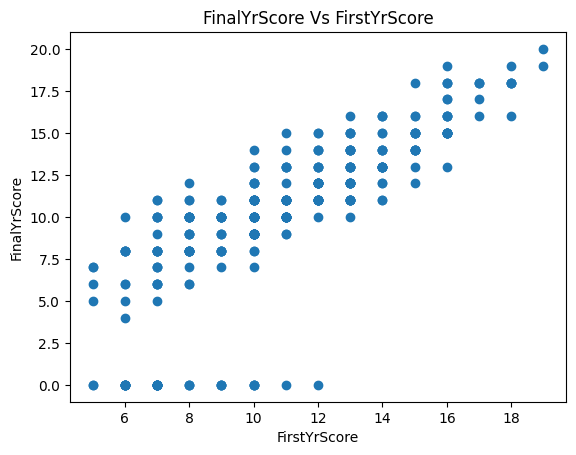

In [15]:
plt.scatter(x_train['FirstYrScore'],y_train)
plt.title("FinalYrScore Vs FirstYrScore")
plt.xlabel("FirstYrScore")
plt.ylabel("FinalYrScore")
plt.plot()

[]

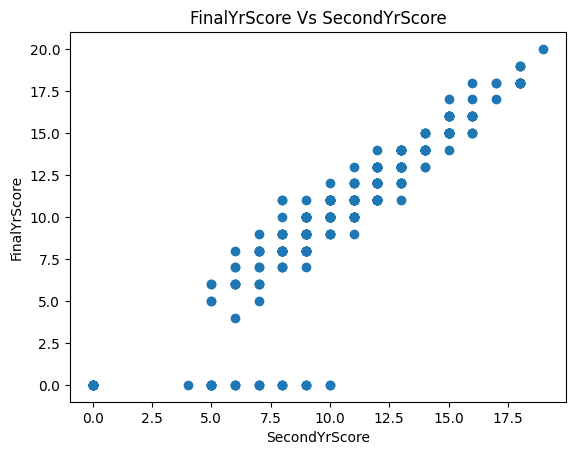

In [16]:
plt.scatter(x_train['SecondYrScore'],y_train)
plt.title("FinalYrScore Vs SecondYrScore")
plt.xlabel("SecondYrScore")
plt.ylabel("FinalYrScore")
plt.plot()

[]

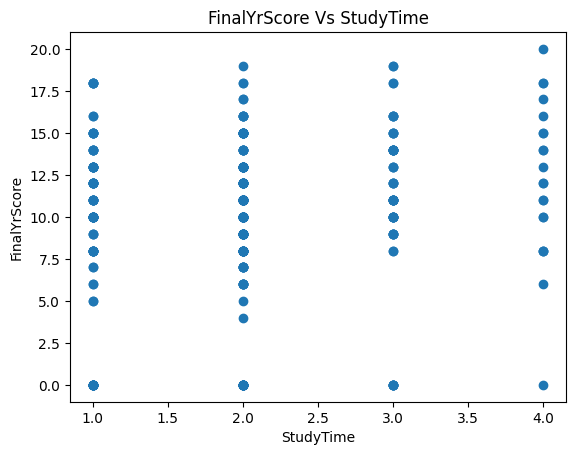

In [17]:
plt.scatter(x_train['StudyTime'],y_train)
plt.title("FinalYrScore Vs StudyTime")
plt.xlabel("StudyTime")
plt.ylabel("FinalYrScore")
plt.plot()

[]

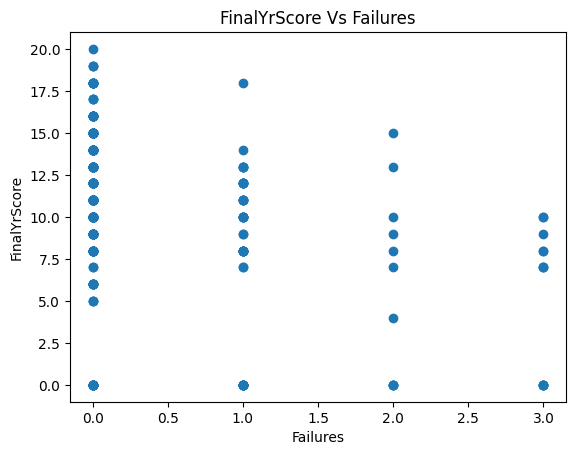

In [18]:
plt.scatter(x_train['Failures'],y_train)
plt.title("FinalYrScore Vs Failures")
plt.xlabel("Failures")
plt.ylabel("FinalYrScore")
plt.plot()

[]

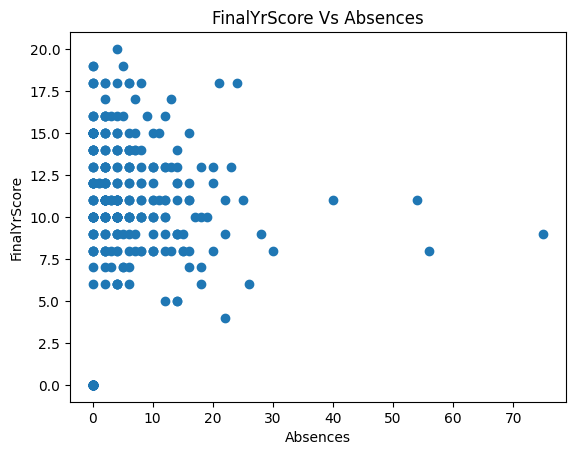

In [19]:
plt.scatter(x_train['Absences'],y_train)
plt.title("FinalYrScore Vs Absences")
plt.xlabel("Absences")
plt.ylabel("FinalYrScore")
plt.plot()

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_pred =model.predict(x_test)


In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_train =  mean_squared_error(y_train,y_pred_train)
mae_train = mean_absolute_error(y_train,y_pred_train)
r2_train = r2_score(y_train,y_pred_train)


print("Evolutioin metrics: Train Data")
print("mean Absolute Error",mae_train)
print("mean_squared error",mse_train)
print("R square Score ",r2_train)

Evolutioin metrics: Train Data
mean Absolute Error 1.1265771263839484
mean_squared error 3.401938678451086
R square Score  0.8380377535545163


In [22]:

mse =  mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)


print("Evolutioin metrics: Train Data")
print("mean Absolute Error",mae)
print("mean_squared error",mse)
print("R square Score ",r2)

Evolutioin metrics: Train Data
mean Absolute Error 1.339415908267092
mean_squared error 4.466503212015603
R square Score  0.7821754247320556


In [23]:
print("model Coefficient",model.coef_)
print("Corresponding feature",features.columns.values)

model Coefficient [ 0.14446336  0.97961532 -0.07123057 -0.45581289  0.0392449 ]
Corresponding feature ['FirstYrScore' 'SecondYrScore' 'StudyTime' 'Failures' 'Absences']
